<a href="https://colab.research.google.com/github/Rekyb415/Machine-Learning/blob/main/End_to_End_ML_BTTH2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bai 1

In [ ]:
PATH = 'drive/MyDrive/public_dataset/housing.csv'

In [ ]:
import pandas as pd 
data = pd.read_csv(PATH)

In [ ]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Câu 2

In [ ]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Câu 1

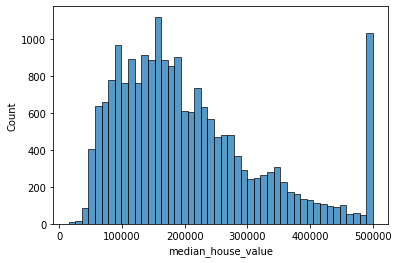

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data['median_house_value'])

Câu 3

In [ ]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

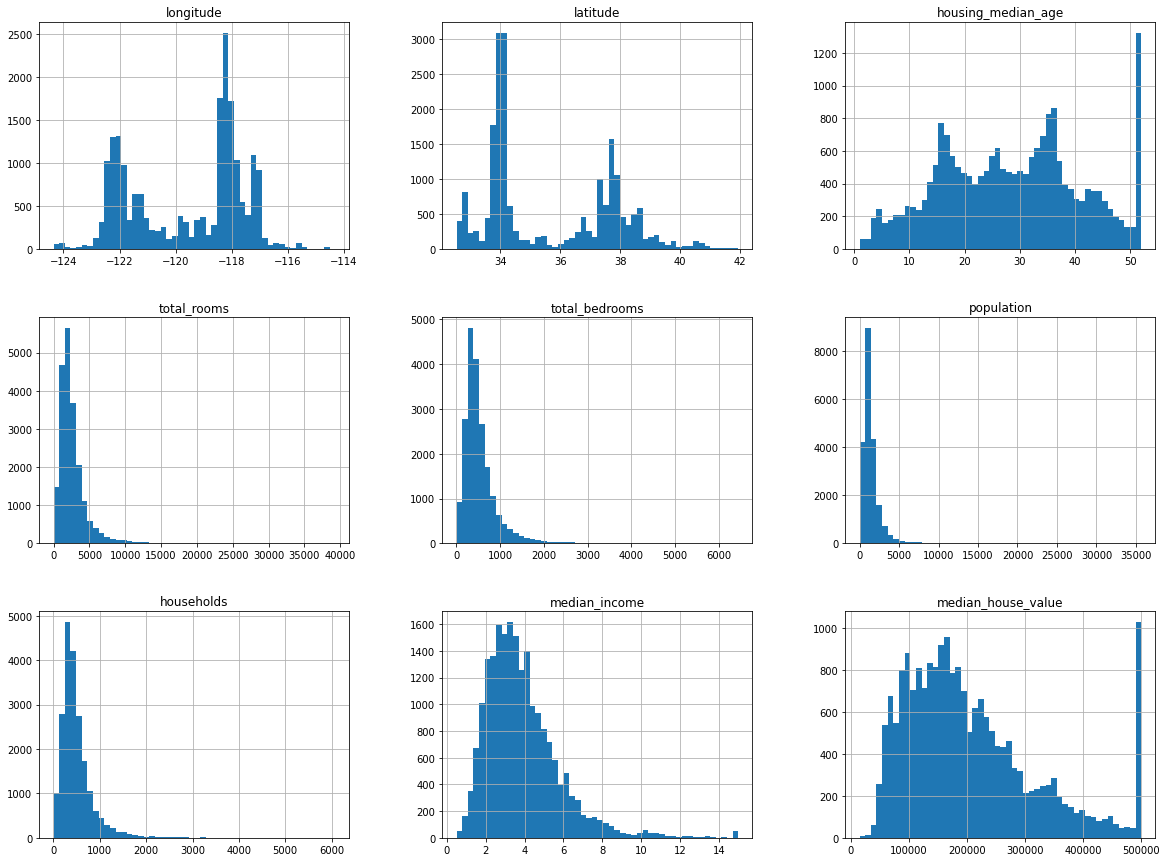

In [ ]:
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(20,15))
plt.show()

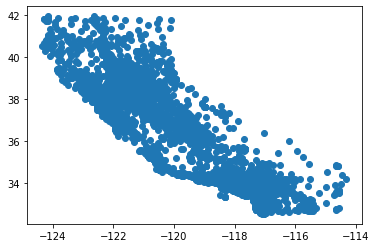

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=data['longitude'], y=data['latitude'])
plt.show()

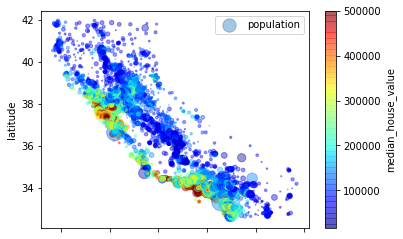

In [ ]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
         s=data["population"]/100, label="population",
         c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
     )
plt.legend()

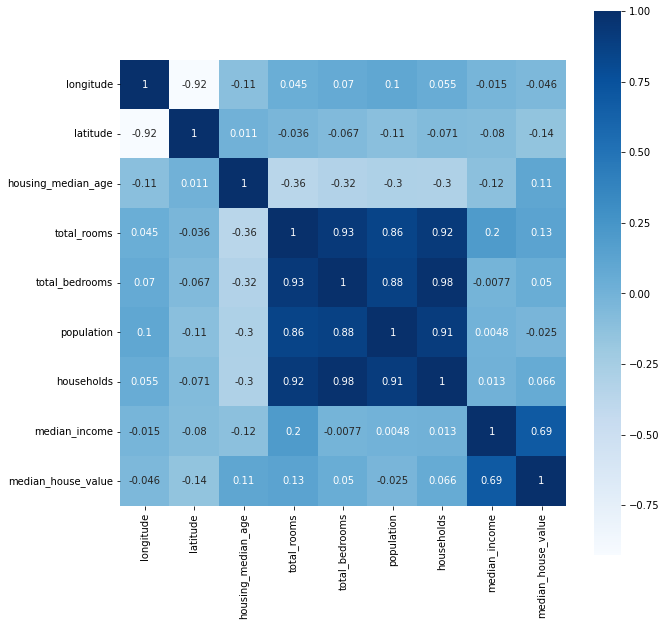

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation = data.corr(method='pearson')
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

Câu 5

In [ ]:
X = data['median_income']
y = data['median_house_value']

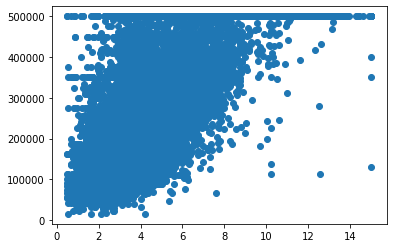

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=X,y=y)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1, 50))
y_transformed = scaler.fit_transform(y.values.reshape(-1, 1))

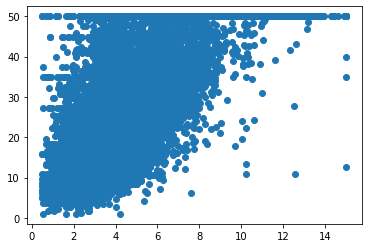

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=X,y=y_transformed)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(1, 55))
y_train_transformed = sc.fit_transform(y_train.reshape(-1,1)).reshape(-1)
y_test_transformed = sc.fit_transform(y_test.reshape(-1,1)).reshape(-1)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train_transformed)

ValueError: ignored

Câu 4

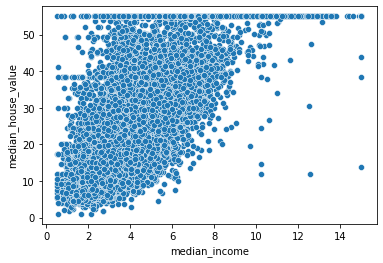

In [ ]:
import seaborn as sns
import pandas as pd
data_visualize = pd.DataFrame({"median_income": X_train, "median_house_value": y_train_transformed})

sns.scatterplot(data=data_visualize, x="median_income", y="median_house_value")

Câu 6

In [ ]:
X_train.shape

(16512,)

In [ ]:
X_test.shape

(4128,)

In [ ]:
y_train.shape

(16512, 1)

In [ ]:
y_test.shape

(4128, 1)

In [ ]:
from sklearn.metrics import mean_squared_error 
y_pred = model.predict(X_test)
mean_squared_error(y_test_transformed, y_pred, squared = True)

NotFittedError: ignored

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
kf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
avg_mse = []
for train_index, test_index in kf.split(X, y_transformed):
 X_train = X.values[train_index].reshape(-1,1)
 y_train = y_transformed[train_index]
 X_test = X.values[test_index].reshape(-1,1)
 y_test = y_transformed[test_index]
 model = LinearRegression()
 model.fit(X_train, y_train)
 y_pred = model.predict(X_test)
 result = mean_squared_error(y_test, y_pred, squared=True)

 # Lưu lại kết quả từng fold vào avg_mse
 avg_mse.append(result)

In [ ]:
import numpy as np
np.mean(np.array(avg_mse))

72.03530701417034

In [ ]:
import seaborn as sns
test_true = pd.DataFrame({'median_income':X_test, 'median_house_value':y_test_transformed})
test_pred = pd.DataFrame({'median_income':X_test, 'median_house_value': y_pred})
fig= plt.figure(figsize=(8,8))
sns.lineplot(data=test_pred, x="median_income",y="median_house_value", color='red')
sns.scatterplot(data=test_true, x="median_income",y="median_house_value")


NameError: ignored

Bai 2

In [ ]:
import numpy as np

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy='median')
X_processed = imp.fit_transform(X.values.reshape(-1,1))


In [ ]:
from sklearn import cross_validation



ImportError: ignored